# Trabajo Práctico Probabilidad y Estadística B

##### Alumno: Molina, Taiel Alexis.
##### Padrón: 109458.

## Enunciado

En el mercado de smartphones, uno podría pensar que los dispositivos con mayor capacidad de almacenamiento suelen tener baterías más duraderas, dado que suelen ser modelos más premium con mejores especificaciones, incluida la batería. Modelar estos datos podría ayudar a estimar la duración de la batería en función de su capacidad de almacenamiento, algo útil para los consumidores al elegir un nuevo dispositivo. El archivo smart.txt posee valores registrados sobre capacidad de almacenamiento (primera columna en GB) y la respectiva duración de baterías (segunda columna en horas). Utilizando Python o R resolver:

1. Antes de suponer una distribución conocida para cada variable, estimar las varianzas de forma insesgada (y por separado).

2. Asumiendo que la distribución de la capacidad de almacenamiento es normal, se desea hacer un test para rechazar que la media es $μ_{0}^{x}$. Graficar el p-valor en función de $μ_{0}^{x}$. Relacionar dicho gráfico con el concepto de nivel de significación. ¿Qué puede decir del punto donde el p-valor alcanza el máximo?

3. Graficar la función de distribución empírica de la capacidad de almacenamiento y compararla con la curva correspondiente a una normal cuya media corresponda al valor que maximiza el p-valor del inciso 2 y cuya varianza sea la estimada en el inciso 1.

4. Antes de asumir una distribución conocida para la duración de las baterías, se desea hacer un test para rechazar que la media es $μ_{0}^{y}$. Graficar el p-valor asintótico en función de $μ_{0}^{y}$. Relacionar dicho gráfico con el concepto de nivel de significación asintótico. ¿Qué puede decir del punto donde el p-valor asintótico alcanza el máximo?

5. Graficar el histograma de la duración de las baterías y compararla con la curva correspondiente a una normal cuya media corresponda al valor que maximiza el p-valor asintótico del inciso 4 y cuya varianza sea la estimada en el inciso 1.

6. Asumiendo que los datos corresponden a una normal bivariada cuyas medias y varianzas son las utilizadas en los incisos 3 y 5 (asumiendo que son los verdaderos valores y son conocidos), graficar la log-verosimilitud en función de $\rho$. Estimar por máxima verosimilitud el coeficiente de correlación. Recomendamos seguir los siguientes pasos:
- Halle una expresión analítica (a mano) para la log-verosimilitud $(\log(L(\rho)) = \sum_{i=1}^{n} \log f_{\rho}(x_i, y_i))$.
- Defina una función que para cada ρ devuelva el valor de $log(L(\rho))$.
- Construir el gráfico pedido. Para evitar errores numéricos suponer $\rho \in [−0.9, 0.9]$.
- Encuentre el $\rho$ que maximiza $log(L(\rho))$ utilizando argmax (numpy).

7. Asumiendo la distribución del inciso 6, utilizando como coeficiente de correlación su estimación, hallar la recta de regresión. Graficar los datos con una nube de puntos y superponer la recta de regresión sobre ellos. Utilice la recta para estimar cuánto duraría la batería de un smartphone de 256GB de almacenamiento. Utilice scatter (matplotlib) para el gráfico.

In [27]:
# rho del pto 6 es 0.5/0.05

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
from math import sqrt, log, pi

In [29]:
with open("tp_proba.txt", "r") as file:
    content = file.read()

columns = content.split('\n')

columna_capacidad = "Capacidad almacenamiento (GB)"
columna_bateria = "Bateria (hs)"

df = pd.DataFrame({
    columna_capacidad: columns[0].strip().split(),
    columna_bateria: columns[1].strip().split()
})

In [30]:
df

,Capacidad almacenamiento (GB),Bateria (hs)
0,1.728410482964301593e+02,1.993094365342351892e+01
1,1.810869536598085290e+02,2.939171332124981717e+01
2,8.389491403880364828e+01,2.166707768538169177e+01
3,1.316523438149948220e+02,2.158607242183519048e+01
4,1.252197524182479356e+02,2.445483764217112110e+01
...,...,...
995,1.285115276831897972e+02,2.166467860323509242e+01
996,1.152488624622447730e+02,2.204388649137436573e+01
997,1.237223550506687104e+02,2.020013715152357747e+01
998,8.097534253823346262e+01,2.243922035497707412e+01


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Capacidad almacenamiento (GB)  1000 non-null   object
 1   Bateria (hs)                   1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [32]:
df[columna_capacidad] = pd.to_numeric(df[columna_capacidad])
df[columna_bateria] = pd.to_numeric(df[columna_bateria])

In [33]:
x = df[columna_capacidad]
y = df[columna_bateria]

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Capacidad almacenamiento (GB)  1000 non-null   float64
 1   Bateria (hs)                   1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [35]:
df.head(5)

,Capacidad almacenamiento (GB),Bateria (hs)
0,172.841048,19.930944
1,181.086954,29.391713
2,83.894914,21.667078
3,131.652344,21.586072
4,125.219752,24.454838


### Ejercicio 1

El estimador de varianza $\hat{\sigma}^2$ con media desconocida es $\sigma^2 = \frac{1}{n} \sum_{i=1}^{n} (X_i - \bar{X})^2$ y para volverlo insesgado multiplicamos por $\frac{n}{n-1}$ quedandonos finalmente

$\rightarrow S^2 = \frac{1}{n - 1} \sum_{i=1}^{n} (X_i - \bar{X})^2$

In [36]:
media_capacidad = x.mean()
media_bateria = y.mean()

In [37]:
def calcular_estimacion_varianza_insesgada(datos, promedio):
    return sum((xi - promedio) ** 2 for xi in datos) / (len(datos) - 1)

In [38]:
estimacion_varianza_capacidad = calcular_estimacion_varianza_insesgada(x, media_capacidad)
estimacion_varianza_bateria = calcular_estimacion_varianza_insesgada(y, media_bateria)

In [39]:
print(f"La estimación de la varianza de la capacidad es de {estimacion_varianza_capacidad:.3f} GB.")

La estimación de la varianza de la capacidad es de 1068.244 GB.


In [40]:
print(f"La estimación de la varianza de la batería es de {estimacion_varianza_bateria:.3f} hs.")

La estimación de la varianza de la batería es de 15.566 hs.


### Ejercicio 2

$H_{0}: \mu_{x} = \mu_{x_{0}}\hspace{0.2cm}$ vs $\hspace{0.2cm}H_{1}: \mu_{x} \neq \mu_{x_{0}}$

Con $T = \sqrt{n} \frac{\bar{X} - \mu_{x_{0}}}{S_{x}} \sim t_{n-1}$, con $S_{x}^2$ como el estimador insesgado de la varianza de la capacidad de almacenamiento

$\delta(\underline{X}) = \mathbb{1}\{T < t_{n - 1, \frac{\alpha}{2}}\} + \mathbb{1}\{T > t_{n - 1, 1 - \frac{\alpha}{2}}\}$


Para hallar el p valor, como se sabe que las $X_{i}$ se distribuyen como $\textit{N}$ se plantea la siguiete ecuación

$P-val(\underline{X}) = \textit{P}_{\mu = \mu^{x}_{0}}(Z > \frac{\sqrt{n}  | \bar{X}-\mu^{x}_{0} |}{S} )$

$P-val(\underline{X}) = 2 \cdot (1 - \Phi(a))$

con $a = \frac{\sqrt{n}  | \bar{X}-\mu^{x}_{0} |}{S_{x}}$ con los valores reemplazados que correspondan

In [41]:
def calcular_p_valor(muestra, valor_a_estimar, n, promedio, s_cuadrado):
    alpha = sp.norm.cdf(sqrt(len(muestra)) * abs(promedio - valor_a_estimar) /  sqrt(s_cuadrado))
    return 2 * (1 - alpha)

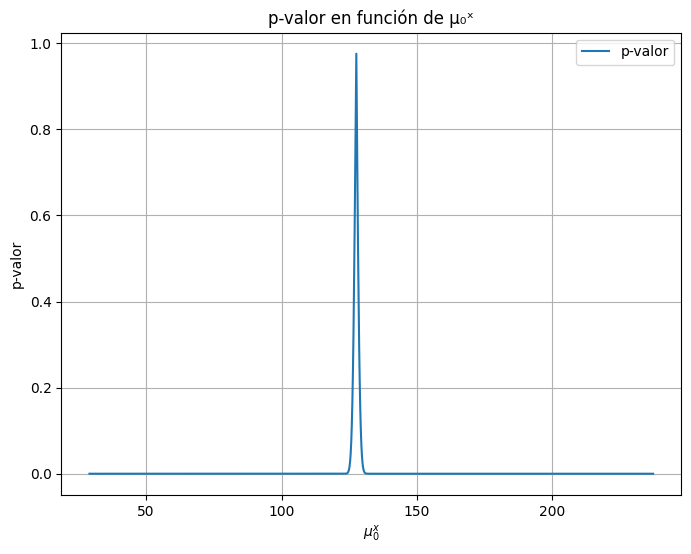

In [42]:
valores_mu_x = np.linspace(x.min(),x.max(), 1000)

p_valores = []

for mu_x in valores_mu_x:
    p_valor = calcular_p_valor(x, mu_x, len(x), media_capacidad, estimacion_varianza_capacidad)
    p_valores.append(p_valor)

plt.figure(figsize=(8, 6))
plt.plot(valores_mu_x, p_valores, label="p-valor")
plt.xlabel(r"$\mu_{0}^{x}$")
plt.ylabel("p-valor")
plt.title("p-valor en función de μ₀ˣ")
plt.grid(True)
plt.legend()
plt.show()

La relación con el nivel de significación $\alpha$ es que si el $p-val(\underline{X}) \geq \alpha$ no se rechaza $H_{0}$ (no se rechaza que $\mu_{x} = \mu_{x_{0}}$)

Como el p-valor se define como el mínimo nivel de significación que permite rechazar $H_{0}$ el punto donde $\mu_{x_{0}}$ alcanza el p-valor máximo es es el punto en el que es más *"díficil"* rechazar $H_{0}$, o en otras palabras, es el $\mu_{x_{0}}$ que minimiza la región de rechazo del test.

### Ejercicio 3

In [43]:
indice_max = np.argmax(p_valores)
max_mu_x = valores_mu_x[indice_max]

In [44]:
max_mu_x

127.61165624956223

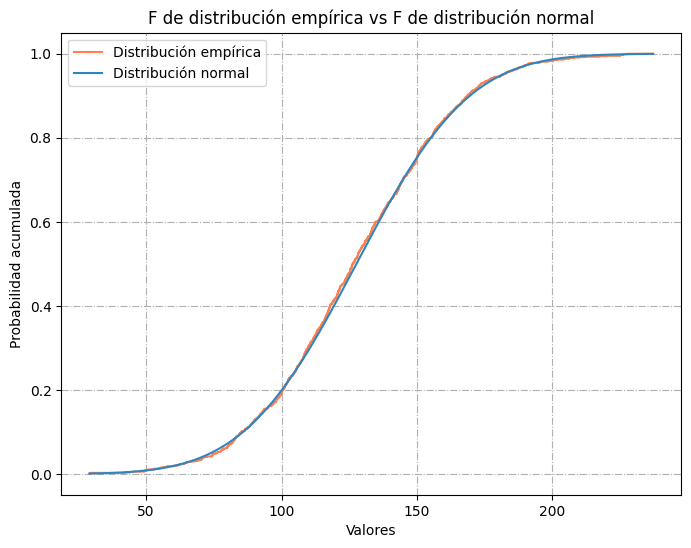

In [45]:
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(data) + 1) / len(data)
    return x, y

w, z = ecdf(x)

plt.figure(figsize=(8, 6))
plt.step(w, z, color="#FF7F50", label="Distribución empírica")

mu = max_mu_x # mu que maximiza el p-valor hallado en el punto 2
sigma = sqrt(estimacion_varianza_capacidad) 

x_normal = np.linspace(np.min(w), np.max(w), 1000)
normal_cdf = sp.norm.cdf(x_normal, mu, sigma)

plt.plot(x_normal, normal_cdf, color="#2E86C1", label="Distribución normal")

plt.xlabel("Valores")
plt.ylabel("Probabilidad acumulada")
plt.title("F de distribución empírica vs F de distribución normal")
plt.legend()
plt.grid(True, linestyle="-.")
plt.show()

### Ejercicio 4

$H_{0}: \mu_{y} = \mu_{y_{0}}\hspace{0.2cm}$ vs $\hspace{0.2cm}H_{1}: \mu_{y} \neq \mu_{y_{0}}$

En este caso como no se conoce ni se asume ninguna distribución, realizamos un test agnóstico

$\frac{\sum_{i=1}^{n}X_{i} - n\mu}{\sqrt{n\sigma^2}} \stackrel{D}\rightarrow \textit{N}(0, 1)$

suponiendo $\textit{S}$ consistente $\rightarrow$ $\frac{\sqrt{n} \bar{X} - \mu}{\sigma} * \frac{\delta}{S_{y}} \stackrel{D}\rightarrow \textit{N}(0, 1)$

$\delta(\underline{X}) = \mathbb{1}\{\frac{\sqrt{n} | \bar{X} - \mu^{x}_{0} |}{S_{y}} > K_{\alpha}\}$

Para calcular el P-valor hacemos lo mismo que antes

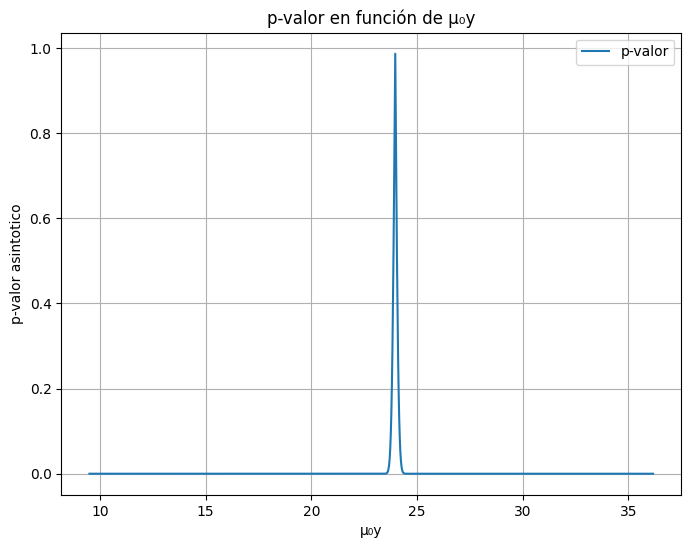

In [46]:
valores_mu_y = np.linspace(y.min(), y.max(), 1000)

p_valores_asintoticos = []

for mu_y in valores_mu_y:
    p_valor = calcular_p_valor(y, mu_y, len(y), media_bateria, estimacion_varianza_bateria)
    p_valores_asintoticos.append(p_valor)

plt.figure(figsize=(8, 6))
plt.plot(valores_mu_y, p_valores_asintoticos, label="p-valor")
plt.xlabel("μ₀y")
plt.ylabel("p-valor asintotico")
plt.title("p-valor en función de μ₀y")
plt.grid(True)
plt.legend()
plt.show()

### Ejercicio 5

In [47]:
indice_max = np.argmax(p_valores_asintoticos)
max_mu_y = valores_mu_y[indice_max]

In [48]:
max_mu_y

23.974220100152927

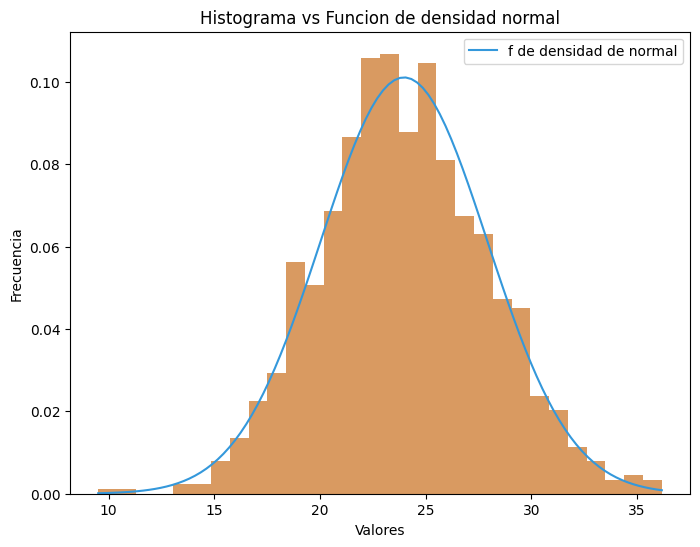

In [49]:
plt.figure(figsize=(8, 6))
plt.hist(y, density=True, bins=30, alpha=0.7, color="#CA6F1E")  

mu = max_mu_y # mu que maximiza el p-valor asintótico del punto 4.
sigma = sqrt(estimacion_varianza_bateria) 

u = np.linspace(np.min(y), np.max(y), 100)
normal_pdf = sp.norm.pdf(u, mu, sigma)

plt.plot(u, normal_pdf, color="#3498DB", label="f de densidad de normal")

plt.xlabel("Valores")
plt.ylabel("Frecuencia")
plt.title("Histograma vs Funcion de densidad normal")
plt.legend()
plt.show()

### Ejercicio 6

Asumiendo que $(X, Y) \sim \textit{N}_{2}(\mu^{x}_{0}, \mu^{y}_{0}, S^{2}_{x}, S^{2}_{y},\rho)$

Busco la log-verosimilitud $\ln(L(\rho)) = \sum_{i=1}^{n} \ln f_{\rho}(x_i, y_i)$

Siendo $f_{\rho}(x_i, y_i) = \frac{1}{2\pi\sigma_{x}}\sigma_{y}\sqrt{1-\rho^2} \hspace{0.2cm} exp(\frac{-1}{2(1-\rho^2)} [\frac{(x_i - \mu_{x})^{2}}{\sigma_{x}^{2}} + \frac{(y_i - \mu_{y})^{2}}{\sigma_{y}^{2}} - \frac{2 \rho(x_i - \mu_{x})(y_i - \mu_{y})}{\sigma_{x}\sigma_{y}}])$



desarollando el término de la derecha solamente tenemos



$\sum_{i=1}^{n} \ln(\frac{1}{2\pi\sigma_{x}\sigma_{y}\sqrt{1-\rho^2}} \hspace{0.2cm} exp(\frac{-1}{2(1-\rho^2)} [\frac{(x_i - \mu_{x})^{2}}{\sigma_{x}^{2}} + \frac{(y_i - \mu_{y})^{2}}{\sigma_{y}^{2}} - \frac{2\rho(x_i - \mu_{x})(y_i - \mu_{y})}{\sigma_{x}\sigma_{y}}]))$


como $\log({a \cdot b}) = \log({a}) + \log({b})$ y $\ln{e^{x}} = x$



$\sum_{i=1}^{n} \ln(\frac{1}{2\pi\sigma_{x}\sigma_{y}\sqrt{1-\rho^2}}) + (\frac{-1}{2(1-\rho^2)} [\frac{(x_i - \mu_{x})^{2}}{\sigma_{x}^{2}} + \frac{(y_i - \mu_{y})^{2}}{\sigma_{y}^{2}} - \frac{2\rho(x_i - \mu_{x})(y_i - \mu_{y})}{\sigma_{x}\sigma_{y}}])$


Distribuyo las sumatorias y me queda 

$n \cdot \ln(\frac{1}{2\pi\sigma_{x}\sigma_{y}\sqrt{1-\rho^2}}) + \sum_{i=1}^{n}\frac{-1}{2(1-\rho^2)} [\frac{(x_i - \mu_{x})^{2}}{\sigma_{x}^{2}} + \frac{(y_i - \mu_{y})^{2}}{\sigma_{y}^{2}} - \frac{2\rho(x_i - \mu_{x})(y_i - \mu_{y})}{\sigma_{x}\sigma_{y}}]$


Llamando:

$a = \sum_{i=1}^{n} \ln(\frac{1}{2\pi\sigma_{x}\sigma_{y}\sqrt{1-\rho^2}}) = n \cdot \ln(\frac{1}{2\pi\sigma_{x}\sigma_{y}\sqrt{1-\rho^2}})$


$b = \frac{-1}{2(1-\rho^2)}$


$c = \frac{(x_i - \mu_{x})^{2}}{\sigma_{x}^{2}}$


$d = \frac{(y_i - \mu_{y})^{2}}{\sigma_{y}^{2}}$


$e = \frac{2\rho(x_i - \mu_{x})(y_i - \mu_{y})}{\sigma_{x}\sigma_{y}}$

In [50]:
def hallar_a(n, rho, sigma_x, sigma_y):
    return n * log(1 / (2 * pi * sigma_x * sigma_y * sqrt(1 - rho ** 2)))

def hallar_b(rho):
    return -1 / (2 * (1 - rho ** 2))

def hallar_c(x, mu_x, sigma_x):
    return ((x - mu_x) ** 2) / (sigma_x ** 2)

def hallar_d(y, mu_y, sigma_y):
    return ((y - mu_y) ** 2) / (sigma_y ** 2)

def hallar_e(rho, x, mu_x, y, mu_y, sigma_x, sigma_y):
    return (2 * rho * (x - mu_x) * (y - mu_y)) / (sigma_x * sigma_y)

In [51]:
def log_verosimilitud(rho, x, y, mu_x, mu_y, var_x, var_y):
    n, sigma_x, sigma_y = len(x), sqrt(var_x), sqrt(var_y)
    a = hallar_a(n, rho, sigma_x, sigma_y)
    b = hallar_b(rho)
    c_d_e = sum(hallar_c(x[i], mu_x, sigma_x) + hallar_d(y[i], mu_y, sigma_y) - hallar_e(rho, x[i], mu_x, y[i], mu_y, sigma_x, sigma_y) for i in range(n))
    return a + b * c_d_e

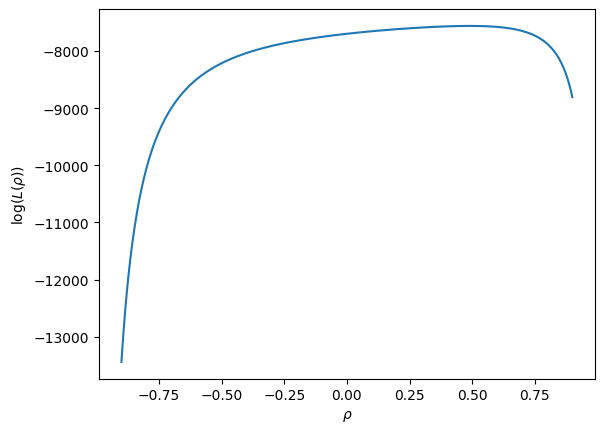

In [52]:
valores_rho = np.linspace(-0.9, 0.9, 1000)
logL = [log_verosimilitud(rho, x, y, max_mu_x, max_mu_y, estimacion_varianza_capacidad, estimacion_varianza_bateria) for rho in valores_rho]
plt.plot(valores_rho, logL)
plt.xlabel(r"$\rho$")
plt.ylabel(r"$\log(L(\rho))$")
plt.show()

In [53]:
indice_max = np.argmax(logL)
max_rho = valores_rho[indice_max]

In [54]:
max_rho

0.49099099099099097

### Ejercicio 7

Teniendo un vector $(X_{1}, X_{2})$ que se distribuye como una normal bivariada, se sabe que $Y | X = x \sim \textit{N}(\mu^{y} + \frac{\rho\sigma_{y}}{\sigma_{x}} (x - \mu_{x}), \sigma_{y}^{2} (1 - \rho^{2}))$

Antes que intentar calcular la recta de regresión con la fórmula vista en clase (la que utiliza cov y demás), veo si $E[Y | X]$ es un predictor lineal.

$E[Y | X = x] = \mu_{y} + \frac{\rho\sigma_{y}}{\sigma_{x}} (x - \mu_{x})$ por ser una VA normal.

Reemplazando $x$ por $X$ ahora nos queda que

$E[Y | X] = \mu_{y} + \frac{\rho\sigma_{y}}{\sigma_{x}} (X - \mu_{x})$

Por lo cual hemos hallado la formula para la recta de regresión

$\hat{y}(X)= \mu_{y} + \frac{\rho\sigma_{y}}{\sigma_{x}} (X - \mu_{x})$


In [55]:
def recta_regresion(x, mu_x, mu_y, var_x, var_y, rho):
    pendiente = rho * (sqrt(var_y) / sqrt(var_x))

    ordenada = mu_y - pendiente * mu_x

    return ordenada + pendiente * x

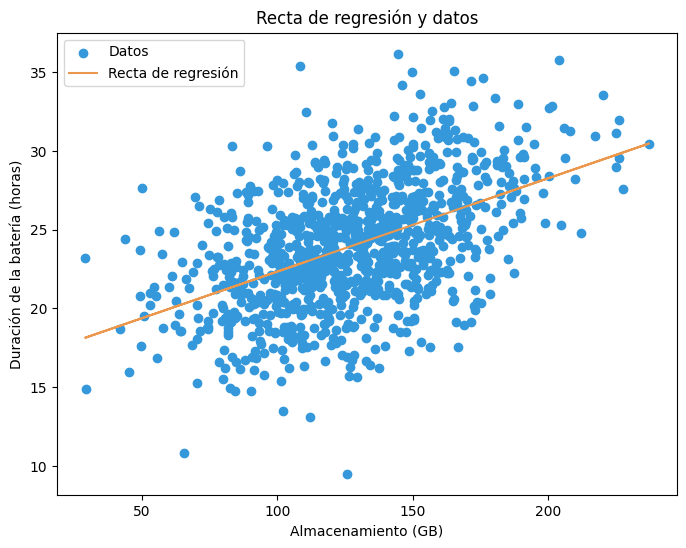

In [56]:
plt.figure(figsize=(8, 6))

plt.scatter(df[columna_capacidad], df[columna_bateria], label="Datos", color="#3498DB")

plt.plot(df[columna_capacidad], [recta_regresion(x, max_mu_x, max_mu_y, estimacion_varianza_capacidad, estimacion_varianza_bateria, max_rho) 
                                 for x in df[columna_capacidad]], color="#EB984E", label="Recta de regresión")

plt.xlabel("Almacenamiento (GB)")
plt.ylabel("Duración de la batería (horas)")
plt.title("Recta de regresión y datos")
plt.legend()
plt.show()

Para estimar cuanto dura la batería de un smartphone con 256GB de almacenamiento, utilizamos la función de la recta de regresión y la evaluamos en 256.

In [57]:
duracion_estimada = recta_regresion(256, max_mu_x, max_mu_y, estimacion_varianza_capacidad, estimacion_varianza_bateria, max_rho)
print(f"La duración estimada de un smartphone con 256GB de almacenamiento es {duracion_estimada:.2f} hs.")

La duración estimada de un smartphone con 256GB de almacenamiento es 31.58 hs.
